# Basic Encoders/Decoders

In [1]:
for codec in ['latin_1', 'utf_8', 'utf_16']:
    print(codec, 'El Niño'.encode(codec), sep='\t')

latin_1	b'El Ni\xf1o'
utf_8	b'El Ni\xc3\xb1o'
utf_16	b'\xff\xfeE\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'


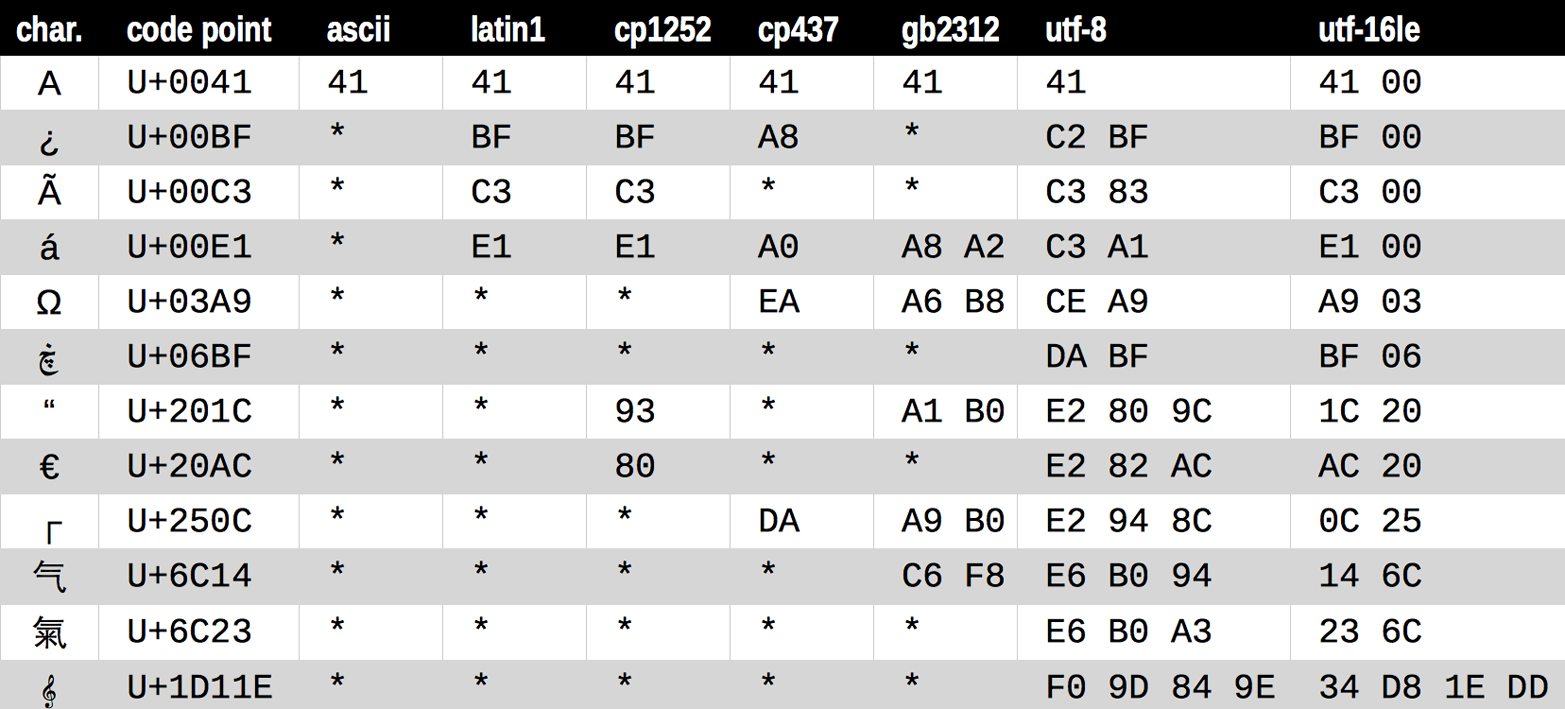

## 1. Understanding Encode/Decode Problems

### 1.1 UnicodeEncodeError

In [2]:
city = 'São Paulo'
city.encode('utf-8')

b'S\xc3\xa3o Paulo'

In [3]:
city.encode('utf-16')

b'\xff\xfeS\x00\xe3\x00o\x00 \x00P\x00a\x00u\x00l\x00o\x00'

In [4]:
city.encode('iso8859_1')

b'S\xe3o Paulo'

In [5]:
city.encode('cp1252')

b'S\xe3o Paulo'

In [6]:
#UnicodeEncodeError
city.encode('cp437')

UnicodeEncodeError: 'charmap' codec can't encode character '\xe3' in position 1: character maps to <undefined>

In [7]:
#error passing => just skips the error  => bad idea
city.encode('cp437', errors='ignore')

b'So Paulo'

In [8]:
#error replacing with ?
city.encode('cp437', errors='replace')

b'S?o Paulo'

In [9]:
#error xmlcharrefreplace
city.encode('cp437', errors='xmlcharrefreplace')

b'S&#227;o Paulo'

### 1.2 UnicodeDecodeError

In [10]:
octets = b'Montr\xe9al'
octets.decode('cp1252')

'Montréal'

In [11]:
octets.decode('iso8859_7')

'Montrιal'

In [12]:
octets.decode('koi8_r')

'MontrИal'

In [13]:
#error of utf-8  => in position 5 = 6th encoded character
octets.decode('utf-8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 5: invalid continuation byte

In [14]:
#error replacing
octets.decode('utf-8', errors='replace')

'Montr�al'

### 1.3 `SyntaxError` when Loading Modules with Unexpected Encoding

In [15]:
#Python is by default support UTF-8

### 1.4 BOM (Byte Order Mark)

In [16]:
u_16 = 'El Niño'.encode('utf-16')
u_16   #BOM = \xff\xfeE

b'\xff\xfeE\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'

In [17]:
#without BOM
u_16le = 'El Niño'.encode('utf-16le')
u_16le

b'E\x00l\x00 \x00N\x00i\x00\xf1\x00o\x00'